In [33]:
import pandas as pd
import glob
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfs = glob.glob('./*.csv')

In [3]:
# Read the files in
for x in dfs:
    if x.find('battles') != -1:
        bt_df = pd.read_csv(x)
    elif x.find('-predictions') != -1:
        cp_df = pd.read_csv(x)
    else:
        cd_df = pd.read_csv(x)

In [4]:
bt_df.shape

(38, 25)

In [5]:
bt_df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
#  Graph analysis. 
# Get these back into single king and ally columns
aka1 = bt_df[['attacker_king', 'attacker_1']]
aka2 = bt_df[['attacker_king', 'attacker_2']]
aka3 = bt_df[['attacker_king', 'attacker_3']]
aka4 = bt_df[['attacker_king', 'attacker_4']]
dkd1 = bt_df[['defender_king', 'defender_1']]
dkd2 = bt_df[['defender_king', 'defender_2']]
dkd3 = bt_df[['defender_king', 'defender_3']]
dkd4 = bt_df[['defender_king', 'defender_4']]

In [7]:
aka1

,attacker_king,attacker_1
0,Joffrey/Tommen Baratheon,Lannister
1,Joffrey/Tommen Baratheon,Lannister
2,Joffrey/Tommen Baratheon,Lannister
3,Robb Stark,Stark
4,Robb Stark,Stark
5,Robb Stark,Stark
6,Joffrey/Tommen Baratheon,Lannister
7,Balon/Euron Greyjoy,Greyjoy
8,Balon/Euron Greyjoy,Greyjoy
9,Balon/Euron Greyjoy,Greyjoy


In [8]:
aka2

,attacker_king,attacker_2
0,Joffrey/Tommen Baratheon,NaN
1,Joffrey/Tommen Baratheon,NaN
2,Joffrey/Tommen Baratheon,NaN
3,Robb Stark,NaN
4,Robb Stark,Tully
5,Robb Stark,Tully
6,Joffrey/Tommen Baratheon,NaN
7,Balon/Euron Greyjoy,NaN
8,Balon/Euron Greyjoy,NaN
9,Balon/Euron Greyjoy,NaN


In [9]:
# Make a list of the df's made in previous cell
mat_list = [aka1, aka2, aka3, aka4, dkd1, dkd2, dkd3, dkd4]

In [10]:
mat_list

[               attacker_king                   attacker_1
 0   Joffrey/Tommen Baratheon                    Lannister
 1   Joffrey/Tommen Baratheon                    Lannister
 2   Joffrey/Tommen Baratheon                    Lannister
 3                 Robb Stark                        Stark
 4                 Robb Stark                        Stark
 5                 Robb Stark                        Stark
 6   Joffrey/Tommen Baratheon                    Lannister
 7        Balon/Euron Greyjoy                      Greyjoy
 8        Balon/Euron Greyjoy                      Greyjoy
 9        Balon/Euron Greyjoy                      Greyjoy
 10                Robb Stark                        Stark
 11       Balon/Euron Greyjoy                      Greyjoy
 12       Balon/Euron Greyjoy                      Greyjoy
 13  Joffrey/Tommen Baratheon                       Bolton
 14                Robb Stark                        Stark
 15         Stannis Baratheon                    Barathe

In [11]:


# Change the column names
for x in mat_list:
    x.columns = ['king', 'ally']



In [12]:
# Concat the frames
bk = pd.concat(mat_list,axis=0)

In [13]:
bk

,king,ally
0,Joffrey/Tommen Baratheon,Lannister
1,Joffrey/Tommen Baratheon,Lannister
2,Joffrey/Tommen Baratheon,Lannister
3,Robb Stark,Stark
4,Robb Stark,Stark
...,...,...
33,Stannis Baratheon,NaN
34,Stannis Baratheon,NaN
35,Robb Stark,NaN
36,Robb Stark,NaN


In [14]:
bk.head(40)

,king,ally
0,Joffrey/Tommen Baratheon,Lannister
1,Joffrey/Tommen Baratheon,Lannister
2,Joffrey/Tommen Baratheon,Lannister
3,Robb Stark,Stark
4,Robb Stark,Stark
5,Robb Stark,Stark
6,Joffrey/Tommen Baratheon,Lannister
7,Balon/Euron Greyjoy,Greyjoy
8,Balon/Euron Greyjoy,Greyjoy
9,Balon/Euron Greyjoy,Greyjoy


In [15]:
# Drop the null allies, since they don't represent an alliance
bk.dropna(inplace=True)

In [16]:
bk.head(40)

,king,ally
0,Joffrey/Tommen Baratheon,Lannister
1,Joffrey/Tommen Baratheon,Lannister
2,Joffrey/Tommen Baratheon,Lannister
3,Robb Stark,Stark
4,Robb Stark,Stark
5,Robb Stark,Stark
6,Joffrey/Tommen Baratheon,Lannister
7,Balon/Euron Greyjoy,Greyjoy
8,Balon/Euron Greyjoy,Greyjoy
9,Balon/Euron Greyjoy,Greyjoy


In [17]:
# Check the shape to make sure it worked
bk.shape

(88, 2)

In [18]:
# Make a crosstab
mx_df = pd.crosstab(bk.king, bk.ally)


In [19]:
mx_df

ally,Baratheon,Blackwood,Bolton,Bracken,Darry,Free folk,Frey,Giants,Glover,Greyjoy,Karstark,Lannister,Mallister,Mormont,Night's Watch,Stark,Thenns,Tully,Tyrell
king,,,,,,,,,,,,,,,,,,,
Balon/Euron Greyjoy,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,1,0,0,0
Joffrey/Tommen Baratheon,2,0,4,1,0,0,3,0,0,1,0,18,1,0,0,0,0,0,2
Mance Rayder,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Renly Baratheon,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Robb Stark,1,1,0,0,2,0,1,0,0,0,0,0,0,0,0,15,0,7,0
Stannis Baratheon,6,0,0,0,0,1,0,1,2,0,2,0,0,2,0,0,1,0,0


In [20]:
# Make a kings x allies copy
kings_x_allies = mx_df.copy()

In [21]:
kings_x_allies

ally,Baratheon,Blackwood,Bolton,Bracken,Darry,Free folk,Frey,Giants,Glover,Greyjoy,Karstark,Lannister,Mallister,Mormont,Night's Watch,Stark,Thenns,Tully,Tyrell
king,,,,,,,,,,,,,,,,,,,
Balon/Euron Greyjoy,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,1,0,0,0
Joffrey/Tommen Baratheon,2,0,4,1,0,0,3,0,0,1,0,18,1,0,0,0,0,0,2
Mance Rayder,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Renly Baratheon,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Robb Stark,1,1,0,0,2,0,1,0,0,0,0,0,0,0,0,15,0,7,0
Stannis Baratheon,6,0,0,0,0,1,0,1,2,0,2,0,0,2,0,0,1,0,0


In [22]:
# ... and an allies x kings copy, transposed.
allies_x_kings = mx_df.T.copy()

In [23]:
allies_x_kings

king,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,Mance Rayder,Renly Baratheon,Robb Stark,Stannis Baratheon
ally,,,,,,
Baratheon,0,2,1,1,1,6
Blackwood,0,0,0,0,1,0
Bolton,0,4,0,0,0,0
Bracken,0,1,0,0,0,0
Darry,0,0,0,0,2,0
Free folk,0,0,0,0,0,1
Frey,0,3,0,0,1,0
Giants,0,0,0,0,0,1
Glover,0,0,0,0,0,2


In [24]:
print(kings_x_allies.shape)
print(allies_x_kings.shape)

(6, 19)
(19, 6)


In [25]:
# Make the adjacency matrix
ally_adj = allies_x_kings.dot(kings_x_allies).copy()

In [26]:
ally_adj

ally,Baratheon,Blackwood,Bolton,Bracken,Darry,Free folk,Frey,Giants,Glover,Greyjoy,Karstark,Lannister,Mallister,Mormont,Night's Watch,Stark,Thenns,Tully,Tyrell
ally,,,,,,,,,,,,,,,,,,,
Baratheon,43,1,8,2,2,6,7,6,12,2,12,36,2,12,1,15,6,7,4
Blackwood,1,1,0,0,2,0,1,0,0,0,0,0,0,0,0,15,0,7,0
Bolton,8,0,16,4,0,0,12,0,0,4,0,72,4,0,0,0,0,0,8
Bracken,2,0,4,1,0,0,3,0,0,1,0,18,1,0,0,0,0,0,2
Darry,2,2,0,0,4,0,2,0,0,0,0,0,0,0,0,30,0,14,0
Free folk,6,0,0,0,0,1,0,1,2,0,2,0,0,2,0,0,1,0,0
Frey,7,1,12,3,2,0,10,0,0,3,0,54,3,0,0,15,0,7,6
Giants,6,0,0,0,0,1,0,1,2,0,2,0,0,2,0,0,1,0,0
Glover,12,0,0,0,0,2,0,2,4,0,4,0,0,4,0,0,2,0,0


In [27]:
ally_adj.shape

(19, 19)

In [28]:
G = nx.from_numpy_matrix(ally_adj.values)
G = nx.relabel_nodes(G, dict(enumerate(ally_adj.columns)))

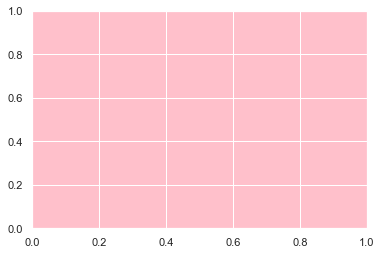

In [39]:
plt.axes.s

In [47]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'#eb4034', 'figure.facecolor':'#eb4034'})

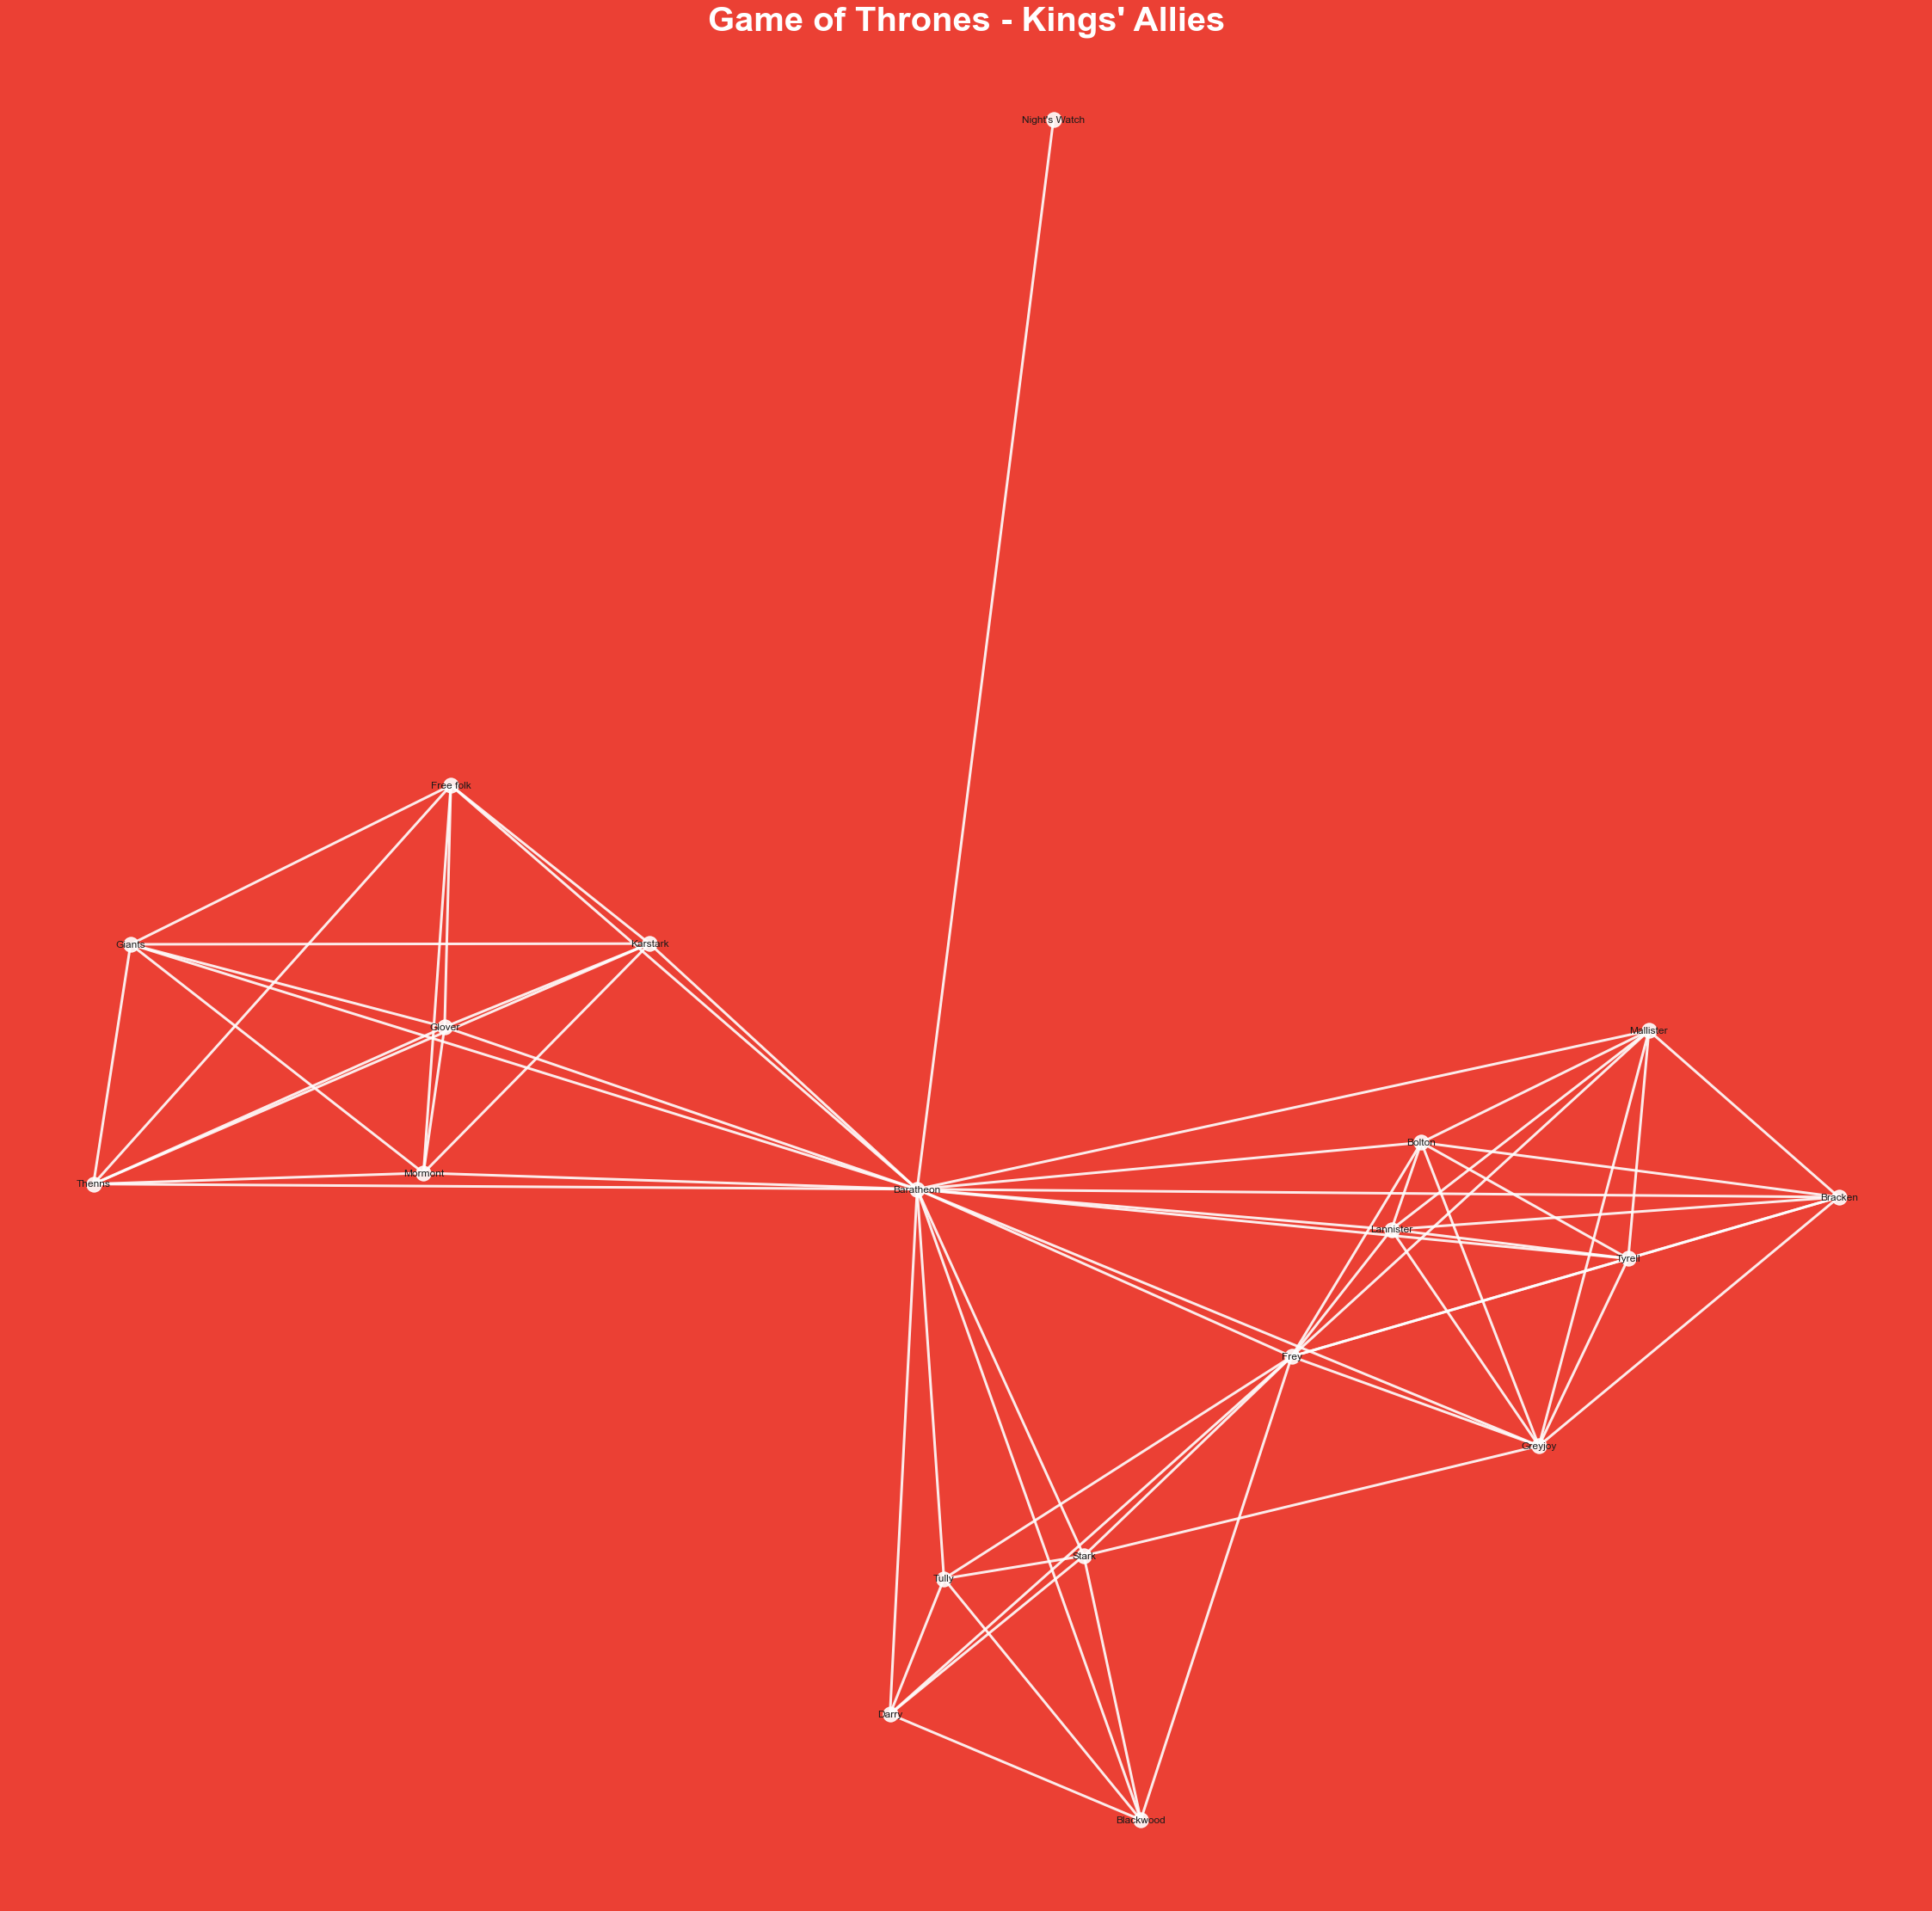

In [58]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=20)
font = {'fontname'   : 'Arial',
            'color'      : 'white',
            'fontweight' : 'bold',
            'fontsize'   : 40}
plt.title("Game of Thrones - Kings' Allies", font)


nx.draw_networkx_nodes(G,pos,node_color='white',alpha=0.9)
nx.draw_networkx_edges(G,pos,alpha=0.9,node_size=0,width=3,edge_color='white')
plt.axis('off')
plt.show()



In [43]:
# Determine centrality for an ordered list of who best has their king's back during a battle
centrality=nx.eigenvector_centrality(G)

In [59]:
loyalty_list = []
for node in centrality:
    loyalty_list.append((node,centrality[node]))
    
sorted_loyalty_list = loyalty_list.sort(key=lambda x: x[1])

In [60]:
# Interesting. The Kingslayer is at the top of this list.
sorted(loyalty_list, key=lambda x: x[1], reverse=True)

[('Baratheon', 0.4449098772450081),
 ('Frey', 0.34149442086462917),
 ('Greyjoy', 0.28756044111024315),
 ('Bolton', 0.26606097948752333),
 ('Bracken', 0.26606097948752333),
 ('Lannister', 0.26606097948752333),
 ('Mallister', 0.26606097948752333),
 ('Tyrell', 0.26606097948752333),
 ('Stark', 0.1942805340645974),
 ('Blackwood', 0.1624585861665946),
 ('Darry', 0.1624585861665946),
 ('Tully', 0.1624585861665946),
 ('Free folk', 0.14652381500012449),
 ('Giants', 0.14652381500012449),
 ('Glover', 0.14652381500012449),
 ('Karstark', 0.14652381500012449),
 ('Mormont', 0.14652381500012449),
 ('Thenns', 0.14652381500012449),
 ("Night's Watch", 0.05536115587691574)]

In [61]:
# Now, let's switch and see what the king look like
king_adj = kings_x_allies.dot(allies_x_kings).copy()

In [62]:
king_adj.shape

(6, 6)

In [63]:
K = nx.from_numpy_matrix(king_adj.values)
K = nx.relabel_nodes(K, dict(enumerate(king_adj.columns)))

In [70]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'#eb4034', 'figure.facecolor':'#d4a408'})

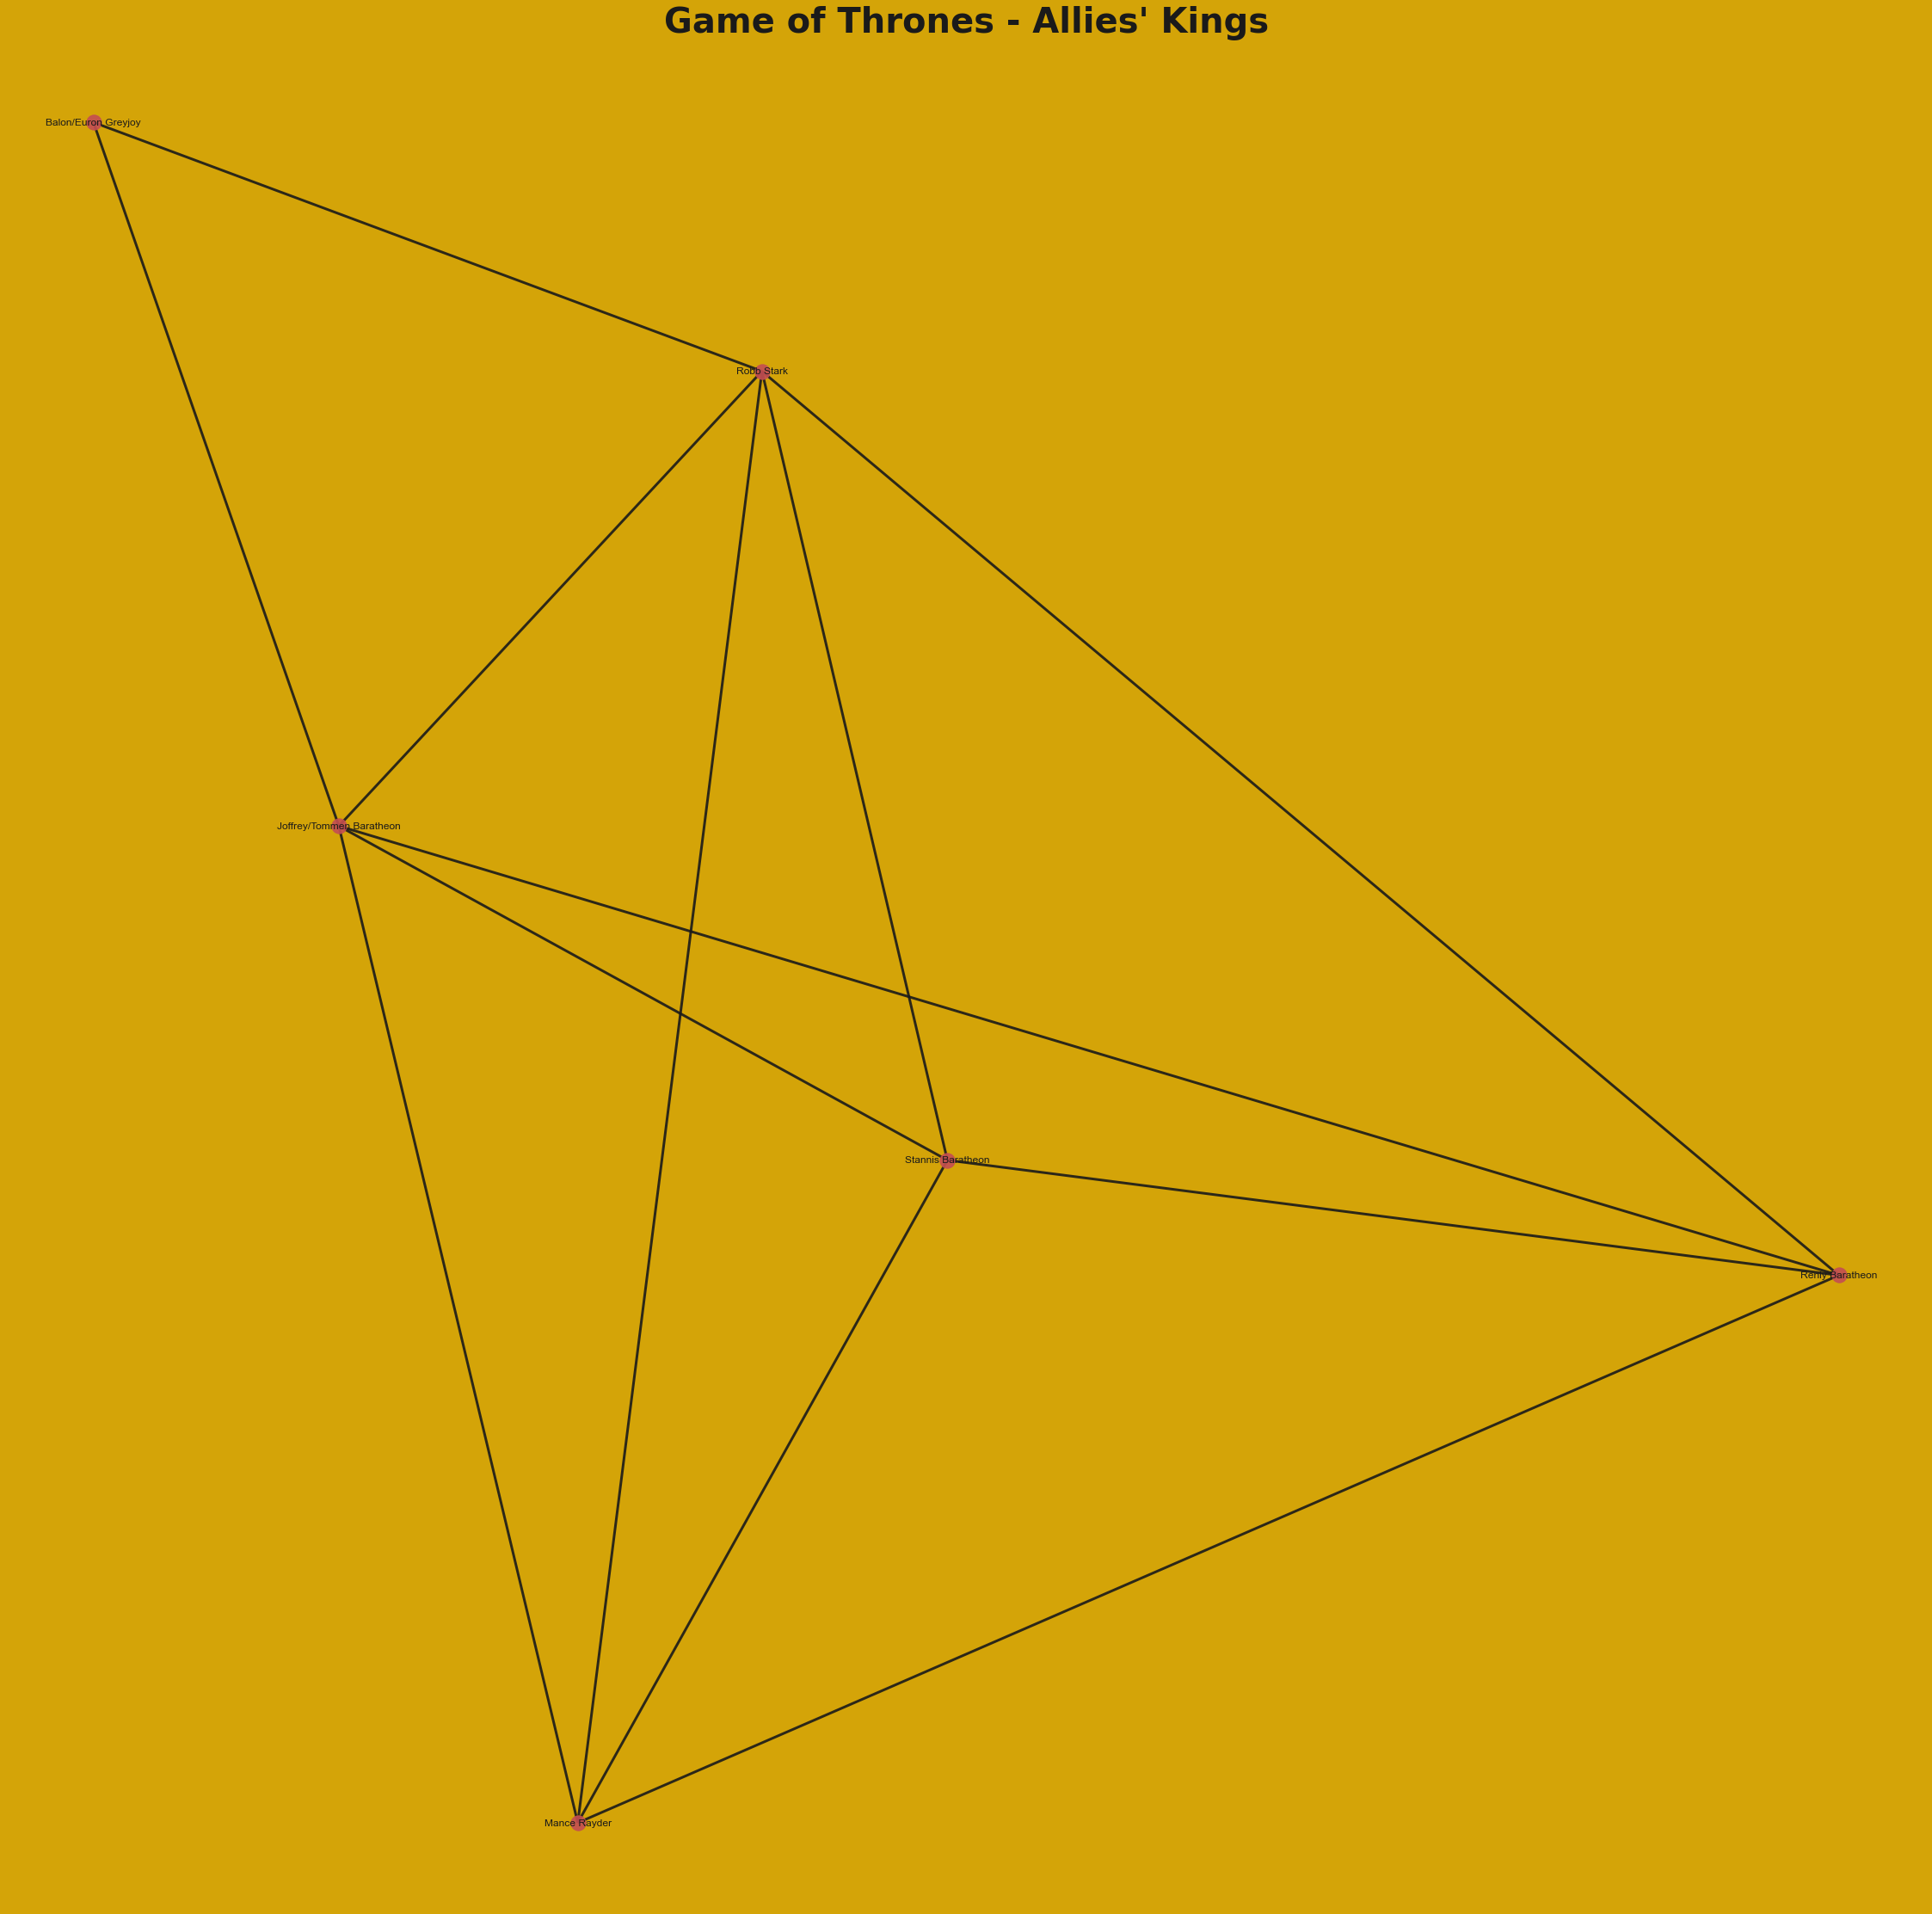

In [73]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(K, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(K,pos,fontsize=20)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 40}
plt.title("Game of Thrones - Allies' Kings", font)


nx.draw_networkx_nodes(K,pos,node_color='r',alpha=0.9)
nx.draw_networkx_edges(K,pos,alpha=0.9,node_size=0,width=3,edge_color='k')
plt.axis('off')
plt.show()

In [67]:
centrality=nx.eigenvector_centrality(K)

In [68]:
king_list = []
for node in centrality:
    king_list.append((node,centrality[node]))
    
sorted_king_list = king_list.sort(key=lambda x: x[1])

In [69]:
# And now for the sorted list of kings
sorted(king_list, key=lambda x: x[1], reverse=True)

[('Joffrey/Tommen Baratheon', 0.4611372761849126),
 ('Robb Stark', 0.4611372761849126),
 ('Mance Rayder', 0.41893468327003863),
 ('Renly Baratheon', 0.41893468327003863),
 ('Stannis Baratheon', 0.41893468327003863),
 ('Balon/Euron Greyjoy', 0.21951313966552505)]